# 2024 BirdCLEF Load Spectrograms and Train ViT
* Load the generated MEL spectrograms and train using fastai/keras/pytorch
* Start with fastai for ease of setup, move to keras/pytorch if need more flexibility
* Attach MEL Dataset with primary labels only and >2 rating
* Architectures to try:
    * arch = 'vit_small_patch16_224' # 'vit_base_patch16_224'
    * arch = "microsoft/swin-tiny-patch4-window7-224"
    * arch = 'swin_base_patch4_window7_224_in22k'
    * arch = 'vit_base_patch16_224'
    * arch = 'convnext_tiny'
   

## Imports

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import librosa
import librosa.display
import IPython.display as ipd

#from fastbook import *
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *

In [2]:
#!unzip -qq /kaggle/input/2024-birdclef-make-spectrograms/_output_.zip

In [3]:
# looks good, next try with the whole dataset

path = Path('/kaggle/input/2024-birdclef-mel-spectrograms-224-x-224/melspectrograms')


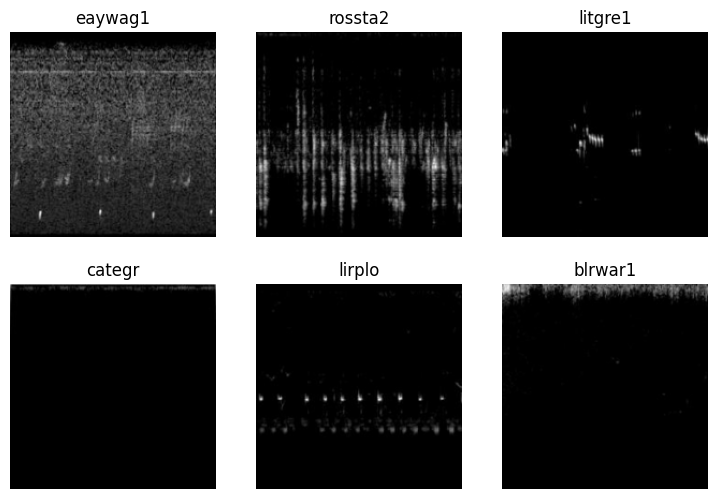

In [4]:
# data block is key with fast.ai
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  #input is an image, output is a category
    get_items = get_image_files,   #returns a list of all images files path
    splitter=RandomSplitter(valid_pct=0.2, seed=12),  # set size of validation set (randomly)
    get_y = parent_label,   # how do we know the correct label?  This function returns the parent folder of the path
    item_tfms=[Resize(192, method='squish')]  # most architectures need all images the same size
).dataloaders(path)   #dataloaders are what pytorch uses to feed the training algo.

dls.show_batch(max_n=6) # shows the input (picture) and the label

In [5]:
print(len(dls.vocab))
dls.vocab

182


['asbfly', 'ashdro1', 'ashpri1', 'ashwoo2', 'asikoe2', 'asiope1', 'aspfly1', 'aspswi1', 'barfly1', 'barswa', 'bcnher', 'bkcbul1', 'bkrfla1', 'bkskit1', 'bkwsti', 'bladro1', 'blaeag1', 'blakit1', 'blhori1', 'blnmon1', 'blrwar1', 'bncwoo3', 'brakit1', 'brasta1', 'brcful1', 'brfowl1', 'brnhao1', 'brnshr', 'brodro1', 'brwjac1', 'brwowl1', 'btbeat1', 'bwfshr1', 'categr', 'chbeat1', 'cohcuc1', 'comfla1', 'comgre', 'comior1', 'comkin1', 'commoo3', 'commyn', 'compea', 'comros', 'comsan', 'comtai1', 'copbar1', 'crbsun2', 'cregos1', 'crfbar1', 'crseag1', 'dafbab1', 'darter2', 'eaywag1', 'emedov2', 'eucdov', 'eurbla2', 'eurcoo', 'forwag1', 'gargan', 'gloibi', 'goflea1', 'graher1', 'grbeat1', 'grecou1', 'greegr', 'grefla1', 'grehor1', 'grejun2', 'grenig1', 'grewar3', 'grnsan', 'grnwar1', 'grtdro1', 'gryfra', 'grynig2', 'grywag', 'gybpri1', 'gyhcaf1', 'heswoo1', 'hoopoe', 'houcro1', 'houspa', 'inbrob1', 'indpit1', 'indrob1', 'indrol2', 'indtit1', 'ingori1', 'inpher1', 'insbab1', 'insowl1', 'integr'

## Train with Fast.ai

In [6]:
# list of supported models in fastai
print([mdl for mdl in dir(models) if '__' not in mdl])

['AlexNet', 'AlexNet_Weights', 'ConvNeXt', 'ConvNeXt_Base_Weights', 'ConvNeXt_Large_Weights', 'ConvNeXt_Small_Weights', 'ConvNeXt_Tiny_Weights', 'DenseNet', 'DenseNet121_Weights', 'DenseNet161_Weights', 'DenseNet169_Weights', 'DenseNet201_Weights', 'EfficientNet', 'EfficientNet_B0_Weights', 'EfficientNet_B1_Weights', 'EfficientNet_B2_Weights', 'EfficientNet_B3_Weights', 'EfficientNet_B4_Weights', 'EfficientNet_B5_Weights', 'EfficientNet_B6_Weights', 'EfficientNet_B7_Weights', 'EfficientNet_V2_L_Weights', 'EfficientNet_V2_M_Weights', 'EfficientNet_V2_S_Weights', 'GoogLeNet', 'GoogLeNetOutputs', 'GoogLeNet_Weights', 'Inception3', 'InceptionOutputs', 'Inception_V3_Weights', 'MNASNet', 'MNASNet0_5_Weights', 'MNASNet0_75_Weights', 'MNASNet1_0_Weights', 'MNASNet1_3_Weights', 'MaxVit', 'MaxVit_T_Weights', 'MobileNetV2', 'MobileNetV3', 'MobileNet_V2_Weights', 'MobileNet_V3_Large_Weights', 'MobileNet_V3_Small_Weights', 'RegNet', 'RegNet_X_16GF_Weights', 'RegNet_X_1_6GF_Weights', 'RegNet_X_32GF_

In [ ]:
# set batch size to bs=64 in vision_learner
#learn = vision_learner(dls,arch=shufflenet_v2_x2_0,weights=ShuffleNet_V2_X2_0_Weights,metrics=accuracy,lr=.05)
learn = vision_learner(dls,resnet18, metrics=accuracy)
learn.fine_tune(5)

In [ ]:
learn.lr_find()
# .001 for efficientnet, tweak this?


In [ ]:
learn.export('2024_bCLEF_melspect_resnet18_192.pkl')

In [ ]:
# plt.figure(figsize=(12,12))
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()             

In [ ]:
# Implement scoring function from kaggle macro-averaged ROC-AUC.

### Spot check on a few files in train